# DATA SCIENCE INTERN @ CODSOFT
## AUTHOR : RITIKA ROY CHOWDHURY
# TASK 5 : CREDIT CARD FRAUD DETECTION

## Installing required packages

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

## Loading dataset

In [16]:
data = pd.read_csv(r'Downloads\creditcard.csv')

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
print(data.shape)

(284807, 31)


In [19]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [20]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)

0.0017304750013189597


In [21]:
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284315


In [22]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
print('details of valid transaction')
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

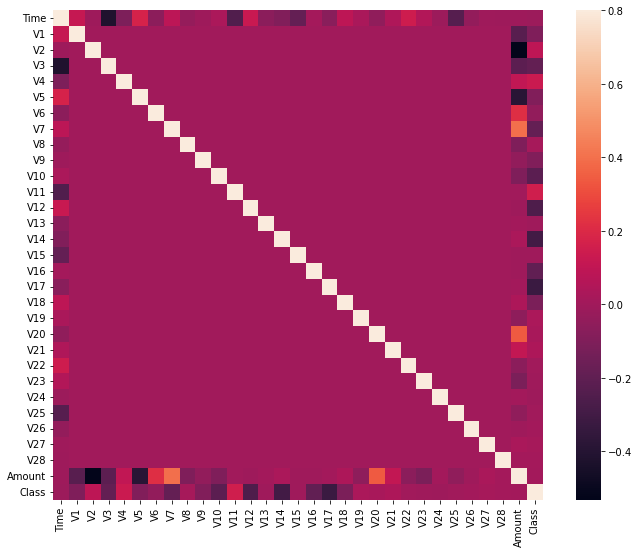

In [24]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [25]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


## Spliting data into training and testing data

In [26]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

## Random Forest Classifier

In [28]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier

In [31]:
# random forest model creation
rfc = RandomForestClassifier()

In [35]:
rfc.fit(xTrain, yTrain)

RandomForestClassifier()

In [36]:
# predictions
yPred = rfc.predict(xTest)

In [37]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [38]:
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print('The model used is Random Forest classifier')

The model used is Random Forest classifier


In [39]:
acc = accuracy_score(yTest, yPred)
print('The accuracy is{}'.format(acc))

The accuracy is0.9995962220427653


In [40]:
prec = precision_score(yTest, yPred)
print('The precision is{}'.format(prec))

The precision is0.9746835443037974


In [41]:
rec = recall_score(yTest, yPred)
print('The recall is{}'.format(rec))

The recall is0.7857142857142857


In [42]:
f1 = f1_score(yTest, yPred)
print('The F1-Score is{}'.format(f1))

The F1-Score is0.8700564971751412


In [43]:
MCC = matthews_corrcoef(yTest, yPred)
print('The Matthews correlation coefficient is{}'.format(MCC))

The Matthews correlation coefficient is0.8749276812909632


## Visualizations

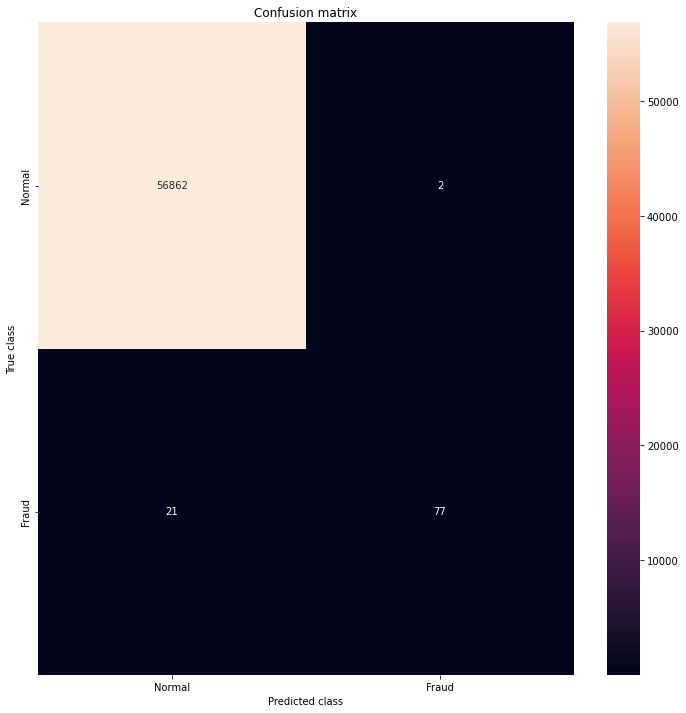

In [44]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [46]:
# Finding out the no of total no of transactions,fraud and non-fraud transactions
total_cases=len(data["Class"])
non_fraud=len(data[data.Class==0])
fraud=total_cases-non_fraud
ratio=(fraud/total_cases)*100
print("The total no of genuine transactions=",total_cases)
print("Total no of non fraud transactions=",non_fraud)
print("Total no of fraud transactions=",fraud)
print("The ratio of fraud transactions=",round(ratio,3))

The total no of genuine transactions= 284807
Total no of non fraud transactions= 284315
Total no of fraud transactions= 492
The ratio of fraud transactions= 0.173


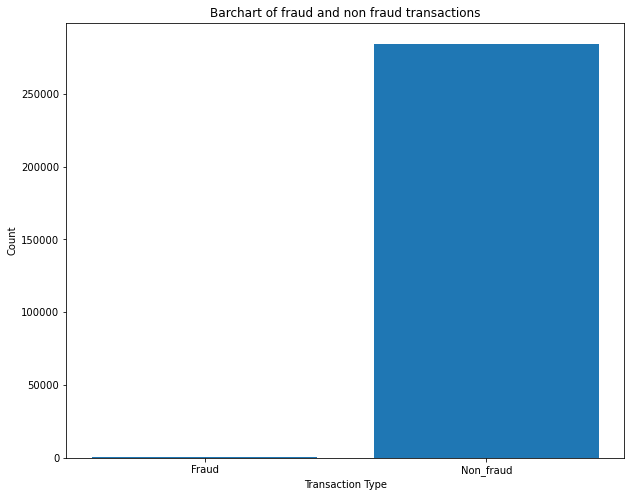

In [47]:
#Bar plot of total no of fraud and non-fraud transactions
plt.figure(figsize=(10,8))
d=pd.DataFrame({"Type":["Fraud","Non_fraud"],"count":[fraud,non_fraud]})
d
plt.bar(d["Type"], d["count"], label="Spam and Ham Messages")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Barchart of fraud and non fraud transactions")
plt.show()

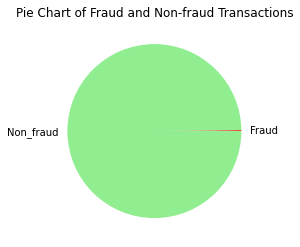

In [48]:
#Bar plot of total no of fraud and non-fraud transactions
colors = ["red", "lightgreen"]
plt.pie(d["count"], labels=d["Type"],colors=colors)
plt.title("Pie Chart of Fraud and Non-fraud Transactions")
# Show the plot
plt.show()

Text(0.5, 1.0, 'Correlation between class and other variables')

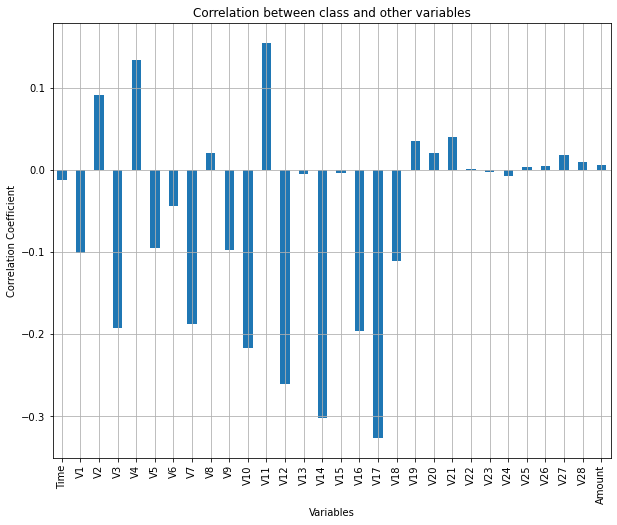

In [50]:
#Correlation between class variable and other variables.
d2=data.drop("Class",axis=1)
d2
corr_with_class=d2.corrwith(data["Class"])
corr_with_class.plot.bar(figsize=(10,8),grid=True)
plt.xlabel("Variables")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation between class and other variables")

Text(0.5, 1.0, 'Heatmap of Correlation')

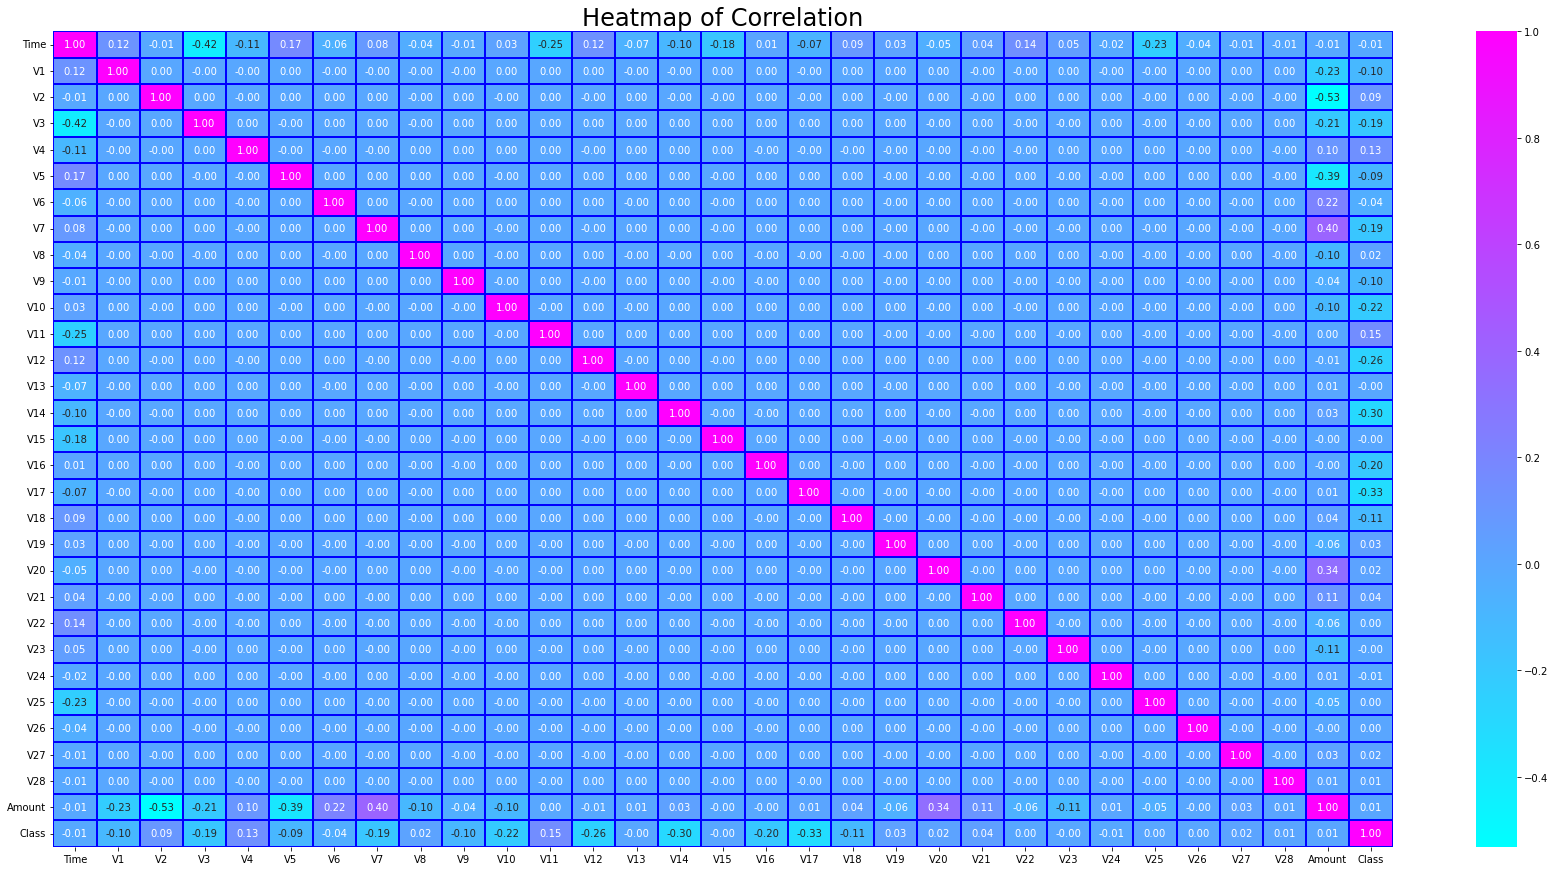

In [51]:
#Correlation matrix
plt.figure(figsize=(30,15))
corr=data.corr()
sns.heatmap(corr,annot=True,linecolor="blue",linewidths=0.1,cmap="cool",fmt=".2f")
plt.title("Heatmap of Correlation",fontsize=24)

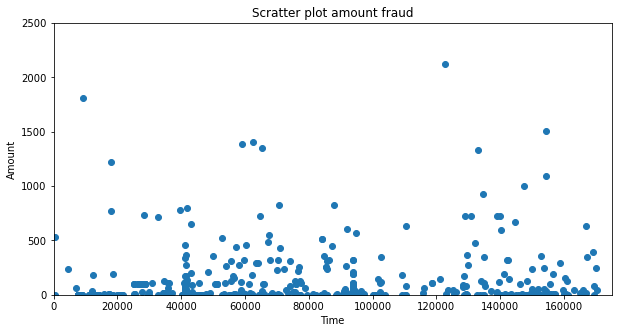

In [52]:
#Scatterplot of amount vs fraud
df_fraud = data[data['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(10,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [53]:
## Seprating data for analysis
fraud = data[data.Class==1]
genuine = data[data.Class==0]
#Finding out the no of rows and columns of the fraud and non-fraud transactions
print(data.shape)
print(fraud.shape)
print(genuine.shape)

(284807, 31)
(492, 31)
(284315, 31)


In [54]:
# we will analyze transition amount during fraud cases
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [55]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [56]:
## Now will try to make dataset balance by taking same value of fradulant data and normal data
genuine_sample = genuine.sample(n=492)
#Merging the sample of genuine transactions with the fraud transactions
new_dataset = pd.concat([genuine_sample,fraud],axis=0)
#showing the top 5 rows of the new dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
74277,55499.0,-1.243042,0.937007,1.238445,1.451008,-0.065967,-0.235687,0.444837,0.200292,-0.151708,...,-0.050451,0.363269,0.133979,0.411002,-0.100822,-0.279142,-0.036502,-0.139462,26.65,0
278099,168037.0,1.996569,-0.669889,-0.518790,-0.726646,-0.931872,-1.006434,-0.532953,-0.126113,1.574119,...,-0.172334,-0.475289,0.371902,-0.111635,-0.653317,0.339563,-0.048387,-0.043052,37.21,0
185576,126729.0,1.928783,-0.053184,-1.780025,1.244189,0.487603,-0.653208,0.500303,-0.188089,0.157222,...,0.089881,0.297853,-0.075341,-0.423563,0.412633,-0.486562,-0.035170,-0.071197,49.57,0
223184,143277.0,2.065700,-1.210286,-2.153711,-2.810246,-0.404934,-1.340640,0.078728,-0.469584,0.422183,...,-0.145686,0.144365,-0.095174,-0.439447,0.362380,-0.701416,0.022874,-0.054999,98.56,0
139359,83114.0,0.726329,-0.434290,0.041656,1.132177,-0.228650,-0.086220,0.347153,-0.016102,-0.335172,...,0.244369,0.250274,-0.281647,0.046917,0.509174,-0.340495,-0.014655,0.046108,228.11,0


In [57]:
# now we made new dataframe with Uniform distribution of fraud data and normal data
new_dataset["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

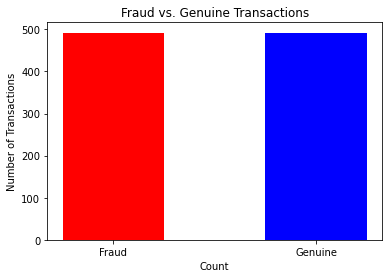

In [58]:
# Create the DataFrame
d = pd.DataFrame({"Class": ["Fraud", "Genuine"], "Count": [492, 492]})

# Create the histogram
plt.bar(d["Class"],d["Count"],width=0.5,color=["red", "blue"])

# Add a title and labels
plt.title("Fraud vs. Genuine Transactions")
plt.xlabel("Count")
plt.ylabel("Number of Transactions")

# Show the plot
plt.show()

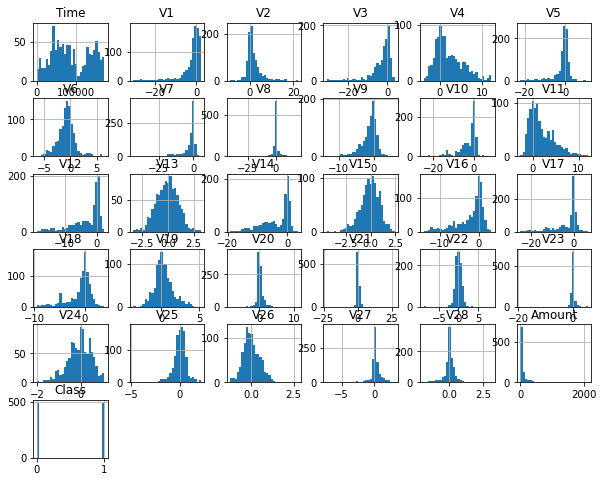

In [59]:
#plotting histograms of each of the variables of the new dataset
new_dataset.hist(bins=30,figsize=(10,8))
plt.show()

<AxesSubplot:>

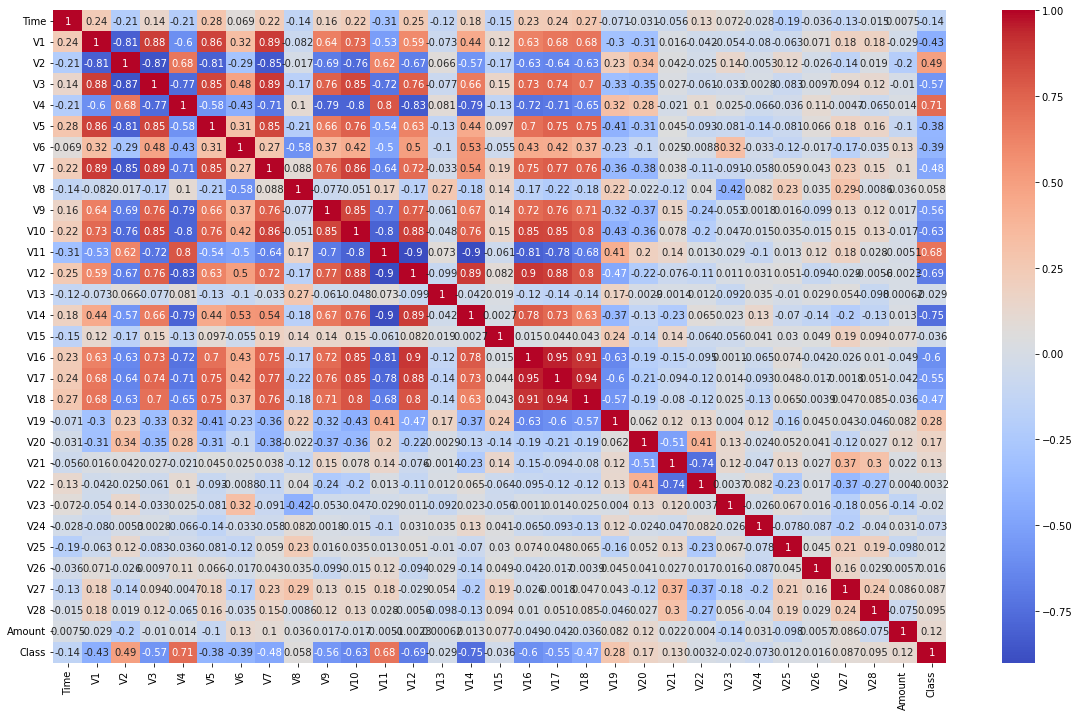

In [60]:
# correlation gives us relation between each varibale. how much each variable is contributing.
correlation =new_dataset.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation,annot=True,cmap="coolwarm")

In [61]:
## Seprating independent and dependent variable
target = new_dataset["Class"]
inputs = new_dataset.drop("Class",axis="columns")

In [62]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,stratify= target ,random_state=2)
print("Training data:{}".format(X_train.shape))
print("Test data:{}".format(X_test.shape))

Training data:(787, 30)
Test data:(197, 30)


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Logistic Regression

In [65]:
lr= LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [66]:
# Accuracy on training data
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("The accuracy of the training data is=",format(training_data_accuracy,".2f"))
F1_score_lr=round(f1_score(X_train_prediction,y_train),2)
print("The F1 score for the training data is=",F1_score_lr)

The accuracy of the training data is= 0.95
The F1 score for the training data is= 0.95


In [67]:
#Classification Report for the training set
report = classification_report(X_train_prediction,y_train)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       409
           1       0.93      0.97      0.95       378

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [68]:
#Accuracy of the test data
X_test_prediction = lr.predict(X_test)
testing_data_accuracy_lr = round(accuracy_score(X_test_prediction,y_test),2)
print("The accuracy of the training data is=",format(testing_data_accuracy_lr,".2f"))
F1_score_lr_test=round(f1_score(X_test_prediction,y_test),2)
print("The F1 score for the training data is=",F1_score_lr_test)

The accuracy of the training data is= 0.91
The F1 score for the training data is= 0.91


In [69]:
#Classification Report for the testing set
report = classification_report(X_test_prediction,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.91      0.92      0.91        97

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



## Decision Tree Classifier

In [70]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
# Accuracy on training data
X_train_prediction = dt.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("The accuracy of the training data is=",format(training_data_accuracy,".2f"))
F1_score_dt=round(f1_score(X_train_prediction,y_train),3)
print("The F1 score for the training data is=",F1_score_dt)

The accuracy of the training data is= 1.00
The F1 score for the training data is= 1.0


In [72]:
#Classification Report for the training set
report = classification_report(X_train_prediction,y_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [73]:
#Accuracy of the test data
X_test_prediction = dt.predict(X_test)
testing_data_accuracy_dt = round(accuracy_score(X_test_prediction,y_test),2)
print("The accuracy of the testing data is=",format(testing_data_accuracy_dt,".2f"))
F1_score_dt_test=round(f1_score(X_test_prediction,y_test),2)
print("The F1 score for the testing data is=",F1_score_dt_test)

The accuracy of the testing data is= 0.87
The F1 score for the testing data is= 0.87


In [74]:
#Classification Report for the testing set
report = classification_report(X_test_prediction,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        95
           1       0.89      0.85      0.87       102

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197



## Random Forest Classifier

In [75]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
# Accuracy on training data
X_train_prediction =rf.predict(X_train)
training_data_accuracy = round(accuracy_score(X_train_prediction, y_train),2)
print("The accuracy of the training data is=",format(training_data_accuracy,".2f"))
F1_score_rf=round(f1_score(X_train_prediction,y_train),3)
print("The F1 score for the training data is=",F1_score_rf)

The accuracy of the training data is= 1.00
The F1 score for the training data is= 1.0


In [77]:
#Classification Report for the training set
report = classification_report(X_train_prediction,y_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [78]:
#Accuracy of the test data
X_test_prediction = rf.predict(X_test)
testing_data_accuracy_rf = round(accuracy_score(X_test_prediction,y_test),2)
print("The accuracy of the training data is=",format(testing_data_accuracy_rf,".2f"))
F1_score_rf_test=round(f1_score(X_test_prediction,y_test),2)
print("The F1 score for the training data is=",F1_score_rf_test)

The accuracy of the training data is= 0.92
The F1 score for the training data is= 0.92


In [79]:
#Classification Report for the testing set
report = classification_report(X_test_prediction,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       108
           1       0.88      0.97      0.92        89

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



In [80]:
table=pd.DataFrame({"Model":["Logistic Regression","Decision Tree","Random Forest"],
                    "Accuracy in %":[100*np.round(testing_data_accuracy_lr,decimals=4),100*np.round(testing_data_accuracy_dt,decimals=4)
                                ,100*np.round(testing_data_accuracy_rf,decimals=4)],
                    "F1-Score":[F1_score_lr_test,F1_score_dt_test,F1_score_rf_test]})
table

,Model,Accuracy in %,F1-Score
0,Logistic Regression,91.0,0.91
1,Decision Tree,87.0,0.87
2,Random Forest,92.0,0.92


### All of the models have accuracy above 90 and f1 score close to 1 for the test Data.So all of this models perform good for the test data.For more robust models we need to have a large number of observations.

# THANK YOU